# Transformada de Hough

#### Por: Luis Antonio Correa Leyva

### RESUMEN

La transformada de Hough es un algoritmo utilizado para la deteccción de figuras en una imagen digital que puedan ser expresadas matemáticamente, tales como rectas, círculos o elipses. Inicialmente el algoritmo sólo se aplicaba a la detección de rectas en una imagen, más tarde se extendió para identificar cualquier figura que se pudiera describir de manera matemática.

### PROBLEMA

En el análisis automatizado de imágenes, es común encontrar el problema de detectar figuras simples. Como primer paso se puede utilizar un detector de bordes para obtener los puntos de la imagen que pertenecen a la frontera de la figura deseada. Sin embargo debido a imperfecciones ya sea de la imagen captada o del algoritmo para la detección de bordes, existen muchos puntos que pertenecen a una figura que se está tratando de detectar que no se encuentran en la imagen; también pueden existir desviaciones espaciales entre la figura ideal y los puntos ruidosos del borde detectado. 

El objetivo de la transformada de Hough es resolver este problema, haciendo posible realizar agrupaciones de los puntos que pertenecen a los bordes de posibles figuras a través de un procedimiento de votación sobre un conjunto de figuras parametrizadas. Será responsabilidad nuestra establecer el umbral de votos para considerar que una línea existe en la imagen.

### ALGORITMO RECTA

Para poder representar todas las posibles rectas que puedan aparecer en la imagen, podemos utilizar la cuación de la recta en coordenadas polares:

$ρ=xcos(θ)+ysin(θ)$

![](images/14.png)

Se tendrá el rango natural de $θ ∈ [0, 2π]$. Luego, se transforma cada punto $(x, y)$ de la imagen de origen, en los puntos $(ρ_i, θ_i )$, el espacio definido por $(ρ, θ)$ se denomina espacio de Hough para el conjunto de rectas en dos dimensiones.

Para un punto arbitrario en la imagen con coordenadas $( x_0 , y_0 )$, las rectas que pasan por ese punto son los pares $(ρ,θ)$ con $r = x*cos(θ) + y*sin(θ)$ donde ρ (la distancia entre la línea y el origen) está determinado por $θ$. Esto corresponde a una curva sinusoidal en el espacio $(ρ,θ)$ que es única para ese punto.

Si las curvas correspondientes a dos puntos se interceptan, el punto de intersección en el espacio de Hough corresponde a una línea en el espacio de la imagen que pasa por estos dos puntos.

Generalizando, un conjunto de puntos que forman una recta, producirán sinusoides que se interceptan en los parámetros de esa línea.

El algoritmo de la transformada de Hough usa una matriz, llamada acumulador, cuya dimensión es igual al  número de parámetros desconocidos del problema, en el caso de una recta la dimensión del acumulador será dos, correspondientes a los valores cuantificados para $(ρ,θ)$

Para construir el acumulador es necesario discretizar los parámetros que describen la figura. Cada celda del acumulador representa una figura cuyos parámetros se pueden obtener a partir de la posición de la celda.

Cada punto en la imagen vota por las posibles rectas a las que puede pertenecer ese punto. Esto se logra buscando todas las posibles combinaciones de valores para parámetros que describen la figura (los posibles valores se obtienen a partir del acumulador).

Si es así, se calculan los parámetros de esa figura, y después se busca la posición en el acumulador correspondiente a la figura definida, y se incrementa el valor que hay en esa posición.

Las figuras se pueden detectar buscando las posiciones del acumulador con mayor valor (máximos locales en el espacio del acumulador). La forma más sencilla de encontrar estos picos es aplicando alguna forma de umbral

![](images/15.png)

Por cada punto se dibujan un número de líneas que pasan por los mismos, con distintos ángulos. Son las líneas continuas.

Por cada línea se dibuja una recta perpendicular a esta que pasa por el origen de coordenadas. Son las líneas discontinuas.

La longitud y el ángulo de cada línea discontinua se calcula. Los resultados se muestran en las tablas.

Se crea un grafo con las longitudes de las líneas por cada ángulo, conocido como grafo del espacio de Hough.

El punto donde las curvas se interceptan da la distancia y el ángulo. Esta distancia y este ángulo indican la recta que se intercepta con los puntos anteriores. El grafo muestra el punto rosado donde se interceptan las curvas, este punto corresponde a la recta rosada de la Figura, que pasa por los tres puntos negros.

### IMPLEMENTACIÓN RECTA

In [1]:
from pylab import *
import cv2 # Utilizando OpenCV

In [2]:
img1 = cv2.imread('dataset/sudoku.jpg')

img2 = cv2.imread('dataset/board.tif')

gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

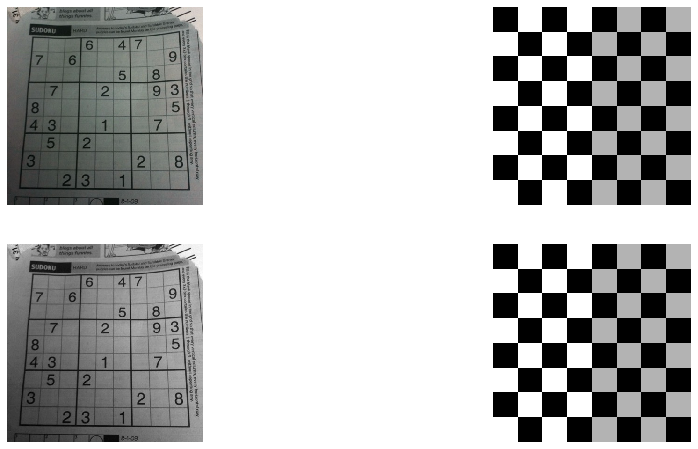

In [3]:
_, ((ax1, ax2), (ax3, ax4)) = subplots(2, 2, figsize=(16, 8))

ax1.imshow(img1)
ax1.set_axis_off()

ax2.imshow(img2)
ax2.set_axis_off()

ax3.imshow(gray1, cmap="gray")
ax3.set_axis_off()

ax4.imshow(gray2, cmap="gray")
ax4.set_axis_off()

show()

Utilizaremos el método de Canny para la detección de bordes, con una pequeña modificación para obtener los umbrales de una manera más eficiente

In [4]:
def canny(image, sigma=0.33):
    
    v = np.median(image)

    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    return edged

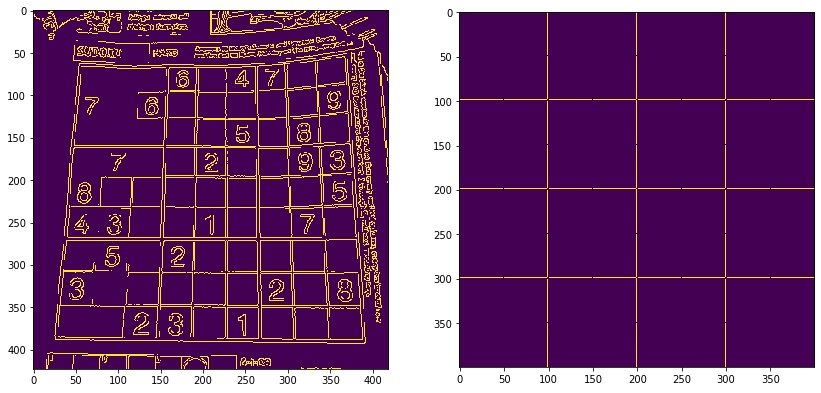

In [5]:
bordes1 = canny(gray1)
bordes2 = canny(gray2)

_, (ax0, ax1) = subplots(1, 2, figsize=(14, 10))

ax0.imshow(bordes1)

ax1.imshow(bordes2)

show()

Aplicamos la transformada de Hough para la detección de líneas.

In [6]:
lines1 = cv2.HoughLines(bordes1,1,pi/180,200)
lines2 = cv2.HoughLines(bordes2,1,pi/180,200)

for line in lines1:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img1,(x1,y1),(x2,y2),(255,0,0),2)
    
for line in lines2:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img2,(x1,y1),(x2,y2),(255,0,0),2)

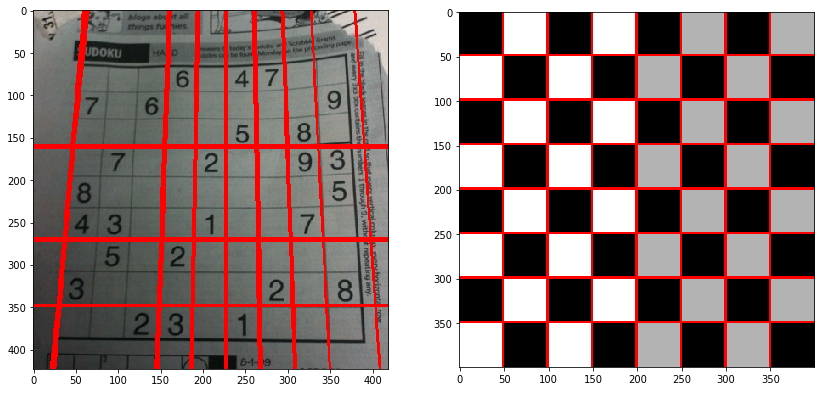

In [7]:
_, (ax0, ax1) = subplots(1, 2, figsize=(14, 10))

ax0.imshow(img1)

ax1.imshow(img2)

show()

### ALGORITMO CÍRCULO

Para definir la transformada de Hough para el círculo, lo primero que debemos hacer es expresar el círculo mediante la siguiente ecuación:

$(x-a)^2+(y-b) ^2=r^2$

Donde $(a,b)$ es el centro del círculo y $r$ su radio. Para encontrar circunferencias usando la transformada de Hough, se necesita un acumulador con tres dimensiones.

Después cada punto en la imagen vota por las circunferencias en los que pudiera estar. Una vez terminado este procedimiento se buscan los picos en el acumulador y con esto se obtienen el radio y el centro de la circunferencia. Si se conociera el radio de antemano, solo se necesitaría un acumulador de dos dimensiones

### IMPLEMENTACIÓN CÍRCULO

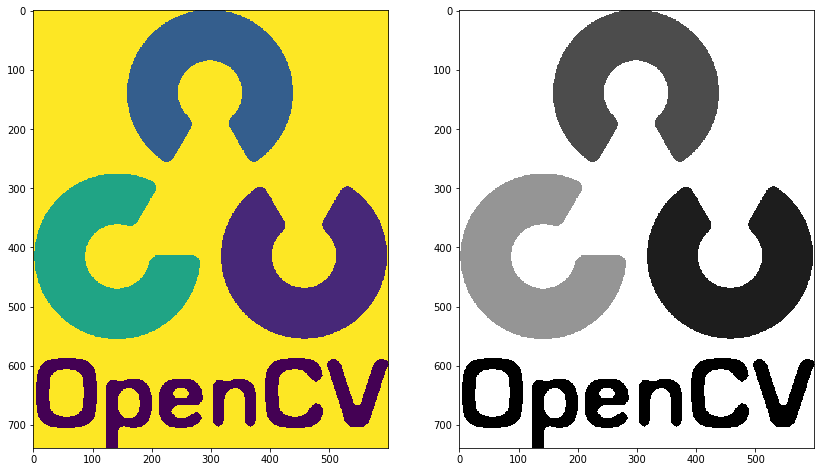

In [8]:
img = cv2.imread('dataset/logo.png',0)

img = cv2.medianBlur(img,21)

cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

_, (ax0, ax1) = subplots(1, 2, figsize=(14, 10))

ax0.imshow(img)

ax1.imshow(cimg)

show()

In [9]:
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))

In [10]:
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

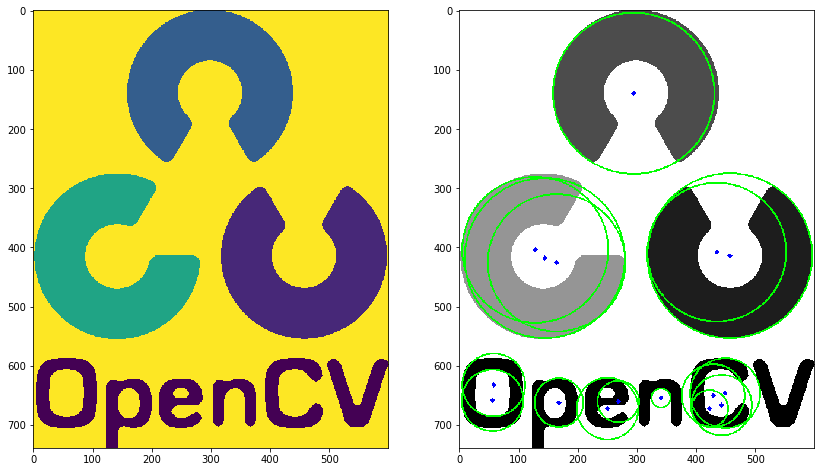

In [11]:
_, (ax0, ax1) = subplots(1, 2, figsize=(14, 10))

ax0.imshow(img)

ax1.imshow(cimg)

show()

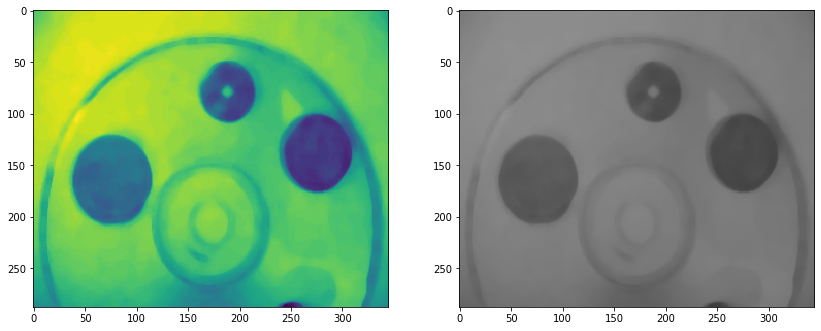

In [12]:
img = cv2.imread('dataset/cc.png',0)

img = cv2.medianBlur(img,11)

cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

_, (ax0, ax1) = subplots(1, 2, figsize=(14, 10))

ax0.imshow(img)

ax1.imshow(cimg)

show()

In [13]:
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))

In [14]:
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

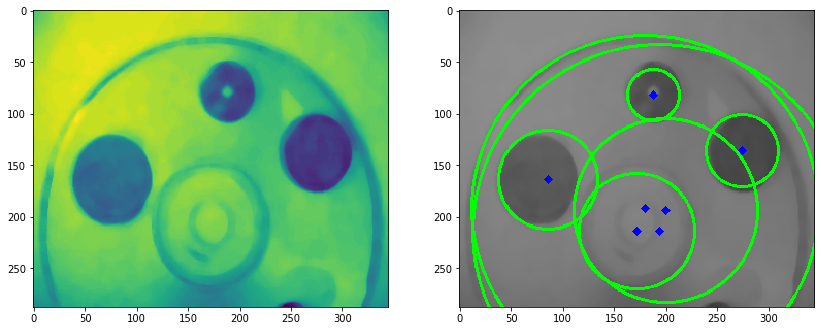

In [15]:
_, (ax0, ax1) = subplots(1, 2, figsize=(14, 10))

ax0.imshow(img)

ax1.imshow(cimg)

show()